<a href="https://colab.research.google.com/github/KumbyYoz/genai-chatbot-app/blob/master/Risk_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytrends

In [2]:
!pip install serpapi

In [3]:
!pip install google-search-results

In [4]:
import pytrends
import serpapi
from pytrends.request import TrendReq
import pandas as pd
import plotly.express as px
#from serpapi.google_search import GoogleSearch
from serpapi import GoogleSearch
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time

In [5]:
params = {
"engine": "google_trends",
"date": 'today 12-m', #Past 12 months
"geo": 'US', #Worldwide
"q": "soda ash, geopolitical", #search term
"api_key": "use a google trends api key here from Serpapi"
}

search = GoogleSearch(params)
results = search.get_dict()
interest_over_time = results["interest_over_time"]
#related_queries = results["related_queries"]
#data['related_topics'] = related_topics

In [6]:
interest_over_time

{'timeline_data': [{'date': 'Jul 30\u2009–\u2009Aug 5, 2023',
   'timestamp': '1690675200',
   'values': [{'query': 'soda ash', 'value': '76', 'extracted_value': 76},
    {'query': 'geopolitical', 'value': '30', 'extracted_value': 30}]},
  {'date': 'Aug 6\u2009–\u200912, 2023',
   'timestamp': '1691280000',
   'values': [{'query': 'soda ash', 'value': '71', 'extracted_value': 71},
    {'query': 'geopolitical', 'value': '31', 'extracted_value': 31}]},
  {'date': 'Aug 13\u2009–\u200919, 2023',
   'timestamp': '1691884800',
   'values': [{'query': 'soda ash', 'value': '60', 'extracted_value': 60},
    {'query': 'geopolitical', 'value': '34', 'extracted_value': 34}]},
  {'date': 'Aug 20\u2009–\u200926, 2023',
   'timestamp': '1692489600',
   'values': [{'query': 'soda ash', 'value': '60', 'extracted_value': 60},
    {'query': 'geopolitical', 'value': '37', 'extracted_value': 37}]},
  {'date': 'Aug 27\u2009–\u2009Sep 2, 2023',
   'timestamp': '1693094400',
   'values': [{'query': 'soda ash'

In [7]:
interest_over_time.keys()

dict_keys(['timeline_data', 'averages'])

In [8]:
def plot_interest_over_time(data: dict):
    timeseries = []

    # Extracting data
    for result in data['interest_over_time']['timeline_data']:
        for value in result['values']:
            query = value['query']
            extracted_value = value['extracted_value']

            timeseries.append({
                'timestamp': result['timestamp'],
                'query': query,
                'extracted_value': extracted_value,
            })

    # Plotting data
    df = pd.DataFrame(data=timeseries)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit = "s")

    sns.set(rc={'figure.figsize': (13, 5)})
    palette = sns.color_palette('mako_r', 2)

    ax = sns.lineplot(
        data=df,
        x='timestamp',
        y='extracted_value',
        hue='query',
        palette=palette,
    )

    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
    plt.title("Google Trends Searches over time")
    ax.set(xlabel='Time')
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))

    plt.show()

<ipython-input-8-91a3758cc264>:18: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit = "s")


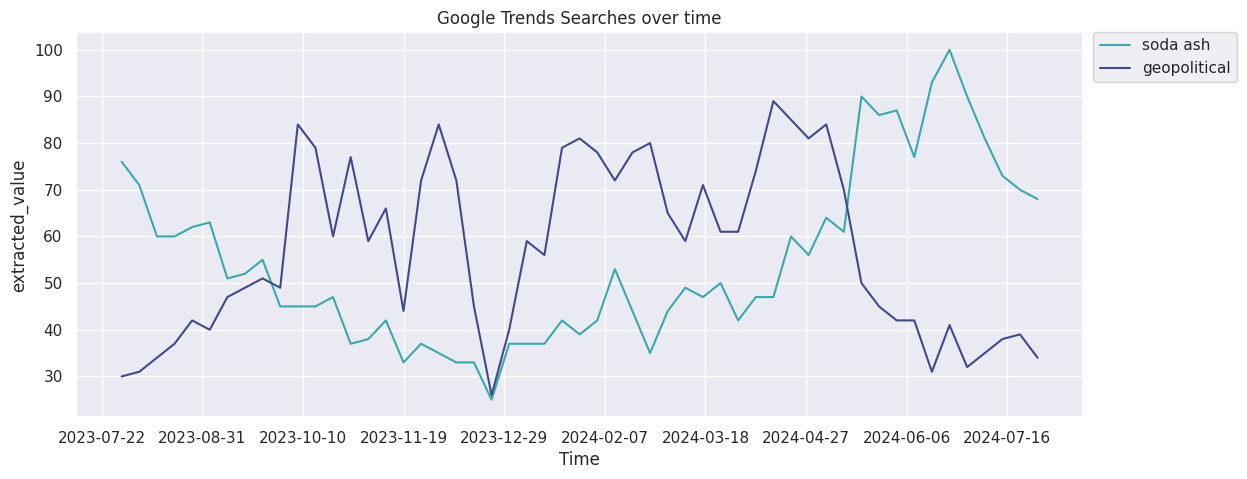

In [9]:
plot_interest_over_time(results)